In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
df = pd.read_csv("/Users/anishkamukherjee/Documents/msg_spam/data/new_spam.csv")
df.head()


,result,text,num_chars,num_words,num_sents,text_trans
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [23]:
df.dropna(inplace=True)
df.isna().sum()

result        0
text          0
num_chars     0
num_words     0
num_sents     0
text_trans    0
dtype: int64

In [24]:
Y = df["result"].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
dftrain, dftest, y_train, y_test = train_test_split(df["text_trans"], Y, test_size=0.33)

In [26]:
MAX_VOCAB_SIZE = 20000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(dftrain)
seq_train = tokenizer.texts_to_sequences(dftrain)
seq_test = tokenizer.texts_to_sequences(dftest)

In [27]:
word2idx = tokenizer.word_counts
V = len(word2idx)
V

5530

In [28]:
# Padding

data_train = tf.keras.preprocessing.sequence.pad_sequences(seq_train)
data_test = tf.keras.preprocessing.sequence.pad_sequences(seq_test, maxlen=data_train.shape[1])
data_train.shape, data_test.shape, data_train.shape[1]

((3726, 73), (1836, 73), 73)

In [29]:
D = 20
M = 15

i = tf.keras.layers.Input(shape=(data_train.shape[1],))
x = tf.keras.layers.Embedding(V + 1, D)(i)
x = tf.keras.layers.LSTM(M, activation='relu', return_sequences=True)(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(i, x)

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
r = model.fit(data_train, y_train, validation_data=(data_test, y_test), epochs=5)

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8581 - loss: 0.4961 - val_accuracy: 0.8693 - val_loss: 0.3461
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8832 - loss: 6000.2153 - val_accuracy: 0.9515 - val_loss: 0.1847
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9586 - loss: 0.1538 - val_accuracy: 0.9700 - val_loss: 0.1331
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9724 - loss: 0.1066 - val_accuracy: 0.9739 - val_loss: 0.1285
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9751 - loss: 0.0855 - val_accuracy: 0.9766 - val_loss: 0.1580


In [33]:
y_hat = model.predict(data_test)
y_hat

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.11833571],
       [0.00029882],
       [0.08908615],
       ...,
       [0.0509444 ],
       [0.0666614 ],
       [0.0236836 ]], dtype=float32)

In [35]:
r2_score(y_test, y_hat) * 100

82.63386487960815

In [36]:
def graph(v1, v2):
    plt.plot(r.history[v1], label=v1)
    plt.plot(r.history[v2], label=v2)
    plt.legend()

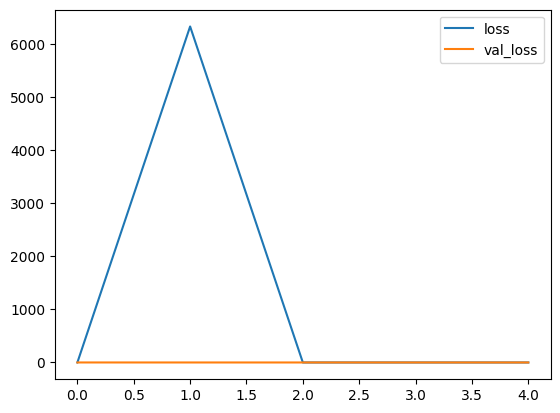

In [37]:
graph('loss', 'val_loss')

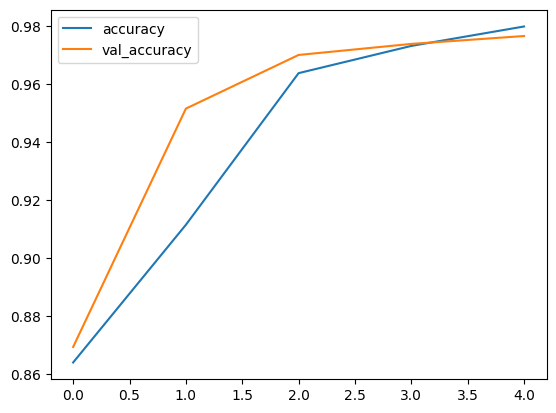

In [38]:
graph('accuracy', 'val_accuracy')

In [47]:
new_text_data = ["congrats you won 1000 clik the link to claim it"]

sequences = tokenizer.texts_to_sequences(new_text_data)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=data_train.shape[1])

predictions = model.predict(padded_sequences)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

print("Final Predictions:", binary_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Final Predictions: [[0]]
